# Principal Component Analysis of Raman Spectra

## Setup

Import required packages

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import style
from itertools import cycle
from sklearn.decomposition import PCA

from sklearn.preprocessing import Normalizer

from _lib.raman_lib.preprocessing import (BaselineCorrector,
                                     RangeLimiter,
                                     SavGolFilter)

from _lib.raman_lib.misc import load_data

style.use("default")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

Settings

In [53]:
# Path where the data is stored
data_path = r"/Users/Praktikum/Documents/HL_540_C_E"

# Spectral range to analyze
# Use 'None' to use the whole range'
wn_min = 500
wn_max = 1600

# Window size for smoothing the spectra
# Higher means stronger smoothing
sg_window = 25

In [54]:
data = load_data(data_path)

if "file" in data.columns:
    X = data.drop(columns=["label", "file"])
else:
    X = data.drop(columns=[""])
    
wns = np.asarray(X.columns.astype(float))
X = np.asarray(X)

y = np.asarray(data.label)
y, y_key = pd.factorize(y, sort=True)

for i, label in enumerate(y_key):
    print(f"{label}: {i}")

Control: 0
Etoposide: 1


Text(0, 0.5, 'Intensity (-)')

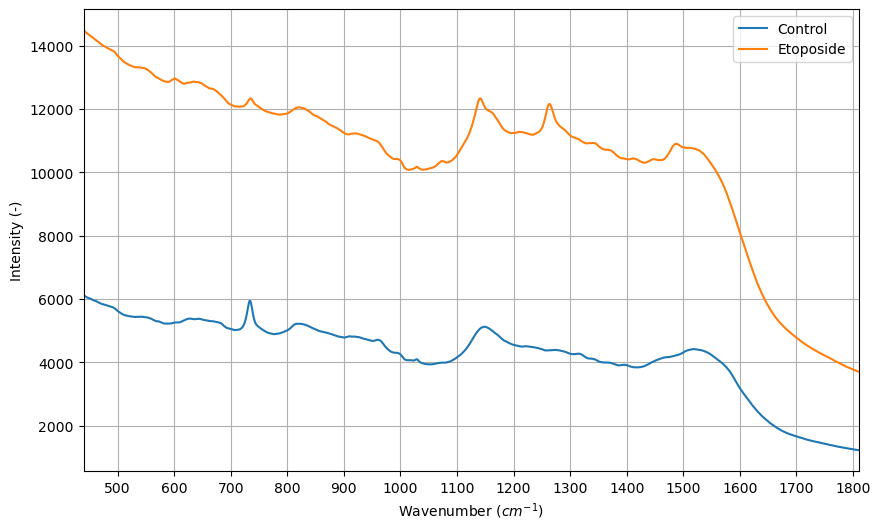

In [55]:
for i in range(len(y_key)):
    plt.plot(wns, X[y==i].mean(axis=0), label=y_key[i])
plt.margins(x=0)
plt.legend()

plt.xticks(range(500, 1801, 100))

plt.grid()
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Intensity (-)")

Text(0, 0.5, 'Intensity (-)')

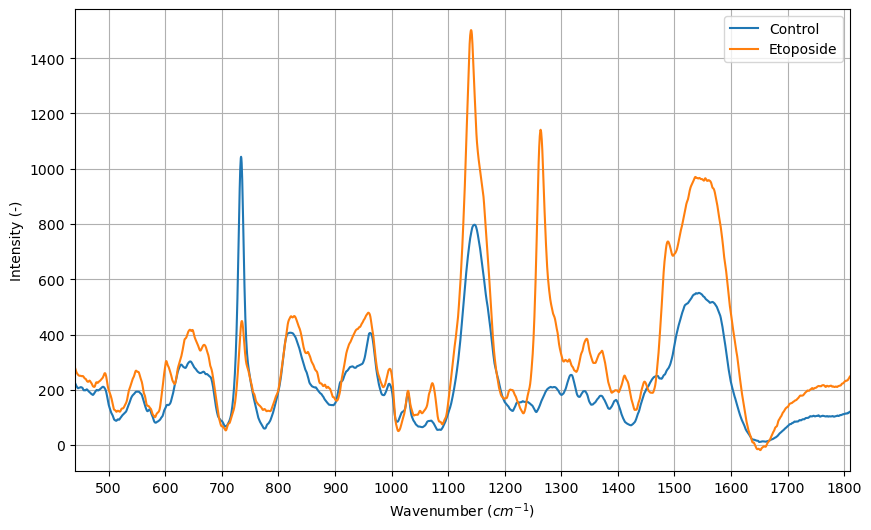

In [56]:
X_bl = BaselineCorrector().fit_transform(X)

for i in range(len(y_key)):
    plt.plot(wns, X_bl[y==i].mean(axis=0), label=y_key[i])
plt.margins(x=0)
plt.legend()

plt.xticks(range(500, 1801, 100))

plt.grid()
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Intensity (-)")

Text(0, 0.5, 'Intensity (-)')

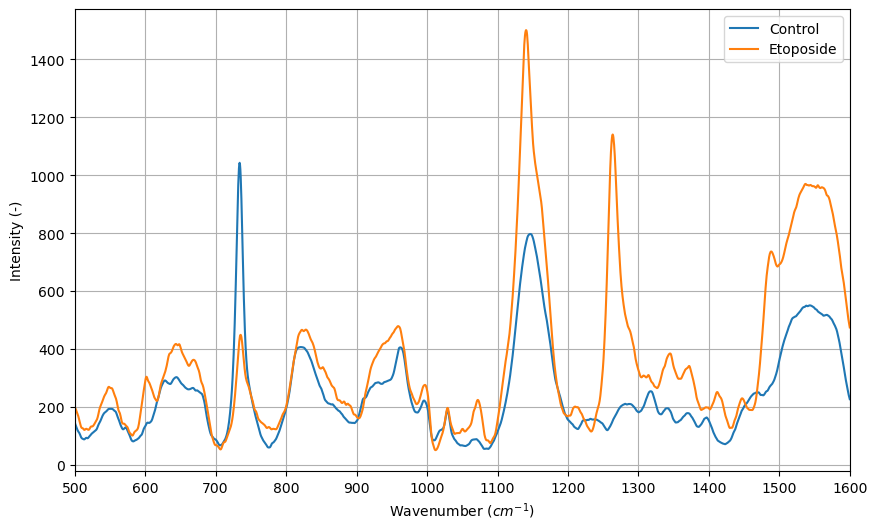

In [57]:
rl = RangeLimiter(lim=(wn_min, wn_max), reference=wns)
X_rl = rl.fit_transform(X_bl)
wns_reduced = wns[rl.lim_[0]:rl.lim_[1]]

for i in range(len(y_key)):
    plt.plot(wns_reduced, X_rl[y==i].mean(axis=0), label=y_key[i])
plt.margins(x=0)
plt.legend()

plt.xticks(range(500, 1601, 100))

plt.grid()
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Intensity (-)")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0, 0.5, 'Intensity (-)')

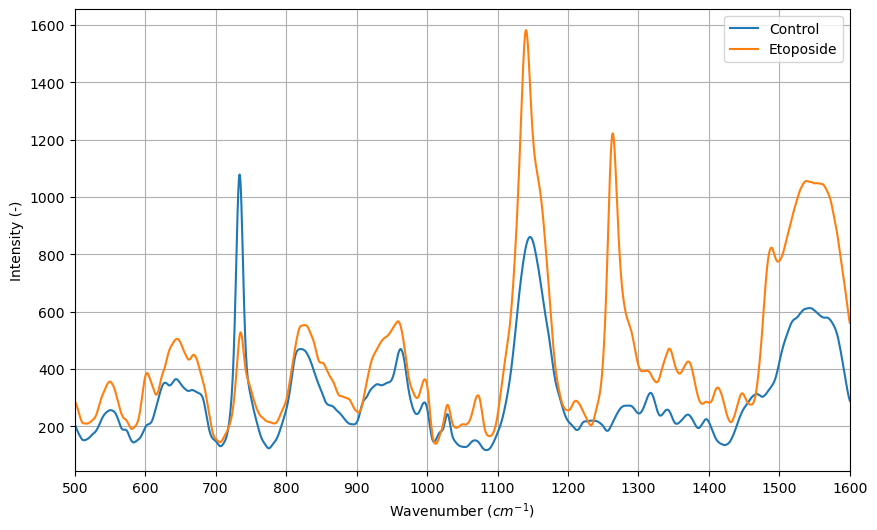

In [58]:
X_smooth = SavGolFilter(window=sg_window).fit_transform(X_rl)

for i in range(len(y_key)):
    plt.plot(wns_reduced, X_smooth[y==i].mean(axis=0), label=y_key[i])
plt.margins(x=0)
plt.legend()

plt.xticks(range(500, 1601, 100))

plt.grid()
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Intensity (-)")

Text(0, 0.5, 'Intensity (-)')

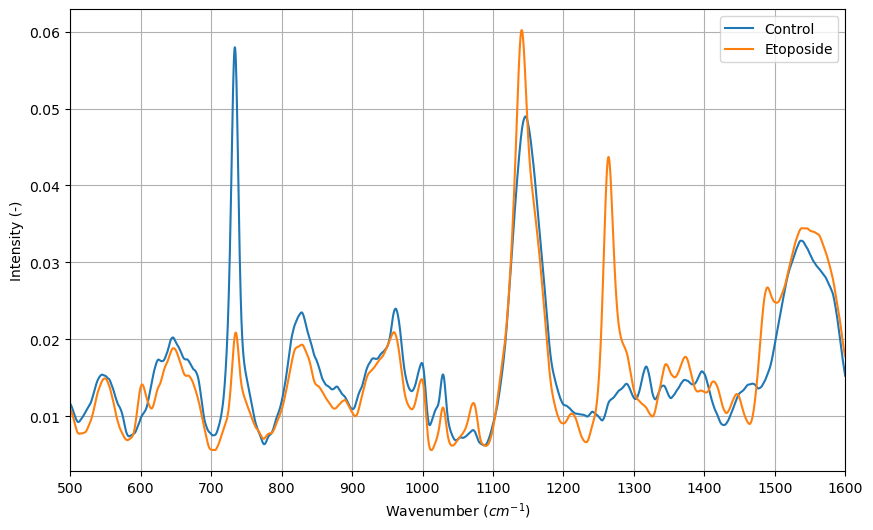

In [59]:


X_norm = Normalizer().fit_transform(X_smooth)

for i in range(len(y_key)):
    plt.plot(wns_reduced, X_norm[y==i].mean(axis=0), label=y_key[i])
plt.margins(x=0)
plt.legend()

plt.xticks(range(500, 1601, 100))

plt.grid()
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Intensity (-)")

In [60]:
n_components = 3

In [61]:
# Run PCA with selected no. of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_norm)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


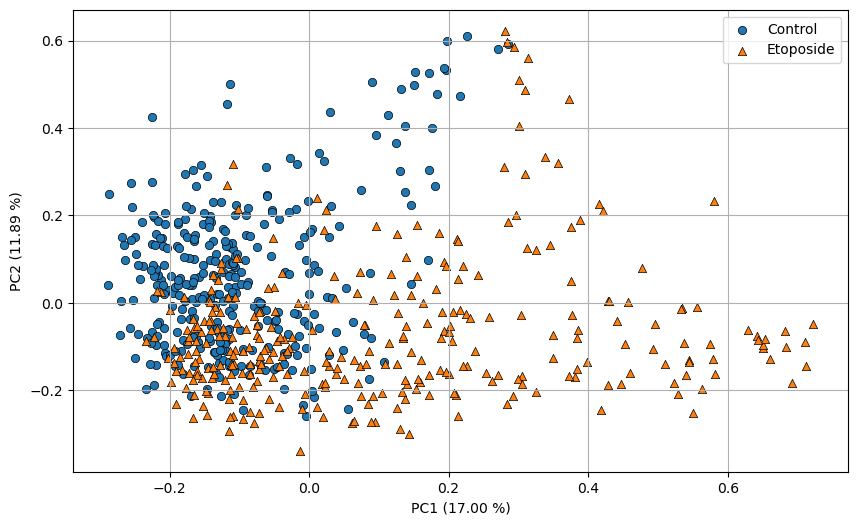

In [62]:
# simple score plot for PC1 and PC2
shapes = ["o", "^", "s", "d", "v", "p", "P", "*", "<", ">"]

for i, marker in zip(range(len(y_key)), cycle(shapes)):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], label = y_key[i], marker=marker, edgecolors="k", linewidths=0.5)

plt.xlabel(f"PC1 ({(pca.explained_variance_ratio_[0] * 100):.2f} %)")
plt.ylabel(f"PC2 ({(pca.explained_variance_ratio_[1] * 100):.2f} %)")
plt.legend()

plt.grid()

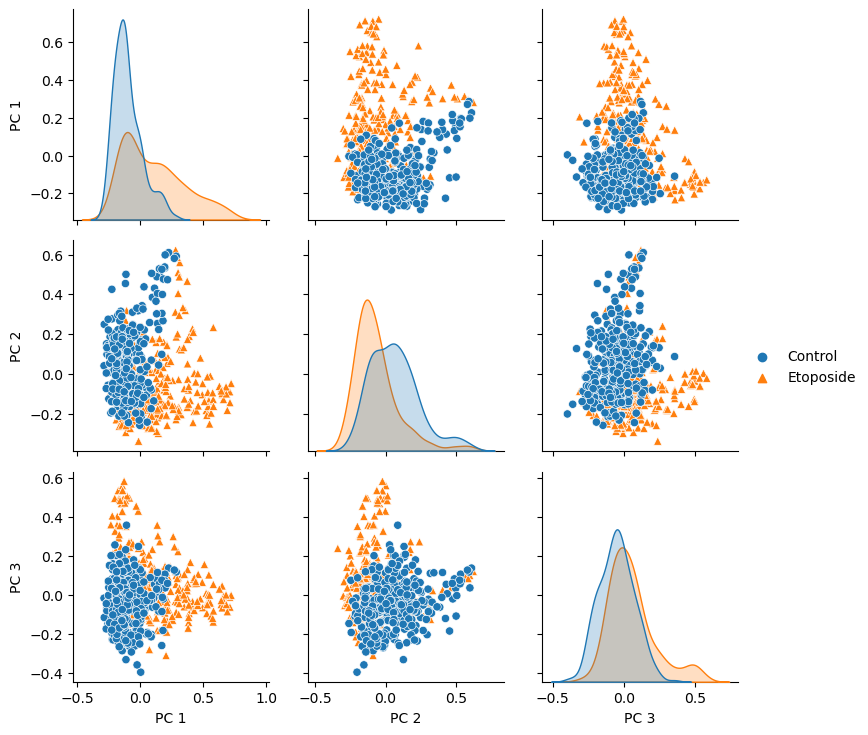

In [63]:
# Pairwise score plot with density plots on the diagonal
plot_data = pd.DataFrame(X_pca, columns=[f"PC {i+1}" for i in range(n_components)])
plot_data.insert(0, "Class", y_key[y])

grid = sns.PairGrid(plot_data, hue="Class", hue_order=y_key)
grid.map_offdiag(sns.scatterplot,
                 style=plot_data["Class"],
                 style_order=y_key,
                 markers=[s for i, s in zip(y_key, cycle(shapes))])
grid.map_diag(sns.kdeplot, fill=True)
grid.set()
grid.add_legend(title="")

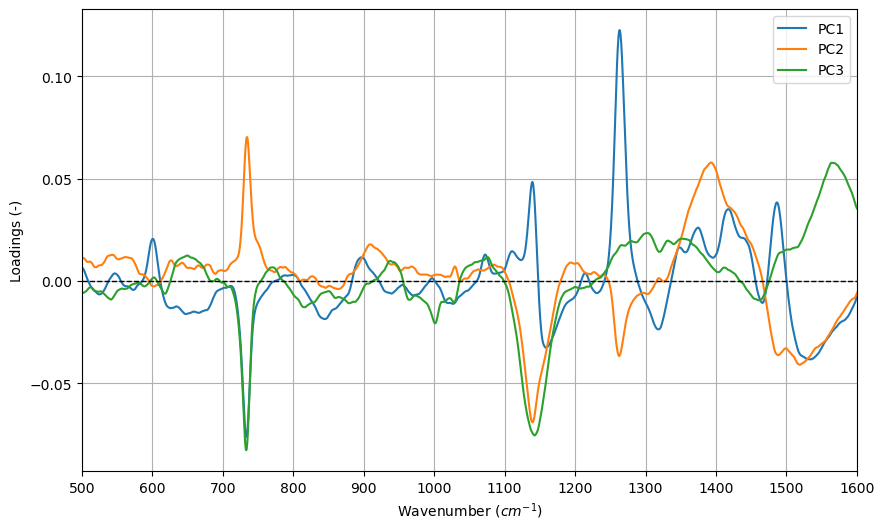

In [64]:
for i, component in enumerate(pca.components_):
    plt.plot(wns_reduced, component, label=f"PC{i+1}")


plt.axhline(y=0, linestyle="--", linewidth=1, color="k")

plt.margins(x=0)

plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Loadings (-)")

plt.xticks(range(500, 1601, 100))

plt.legend()

plt.grid()